# Tapping analyses (all experiments) 
Tapping analyses from Fink, Alexander, and Janata (2022).
This notebook steps through statistical analyses and figures presented in Fink, Alexander, and Janata (2022), related to tapping data. For subjective ratings analyses, please see the notebook `GEM_subjective_analyses.ipynb`. The analyses in this notebook rely on two data tables that have also been released with this repository (in the data folder). As long as file paths to those .csv files are set accordingly, all analyses should run in Jupyter on anyone's machine.

#### Prepared by Lauren Fink
For questions: email lkfink@ucdavis.edu or lauren.fink@ae.mpg.de

In [50]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Load required packages
import os
import sys
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import *
import re
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pingouin as pg
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') 

# Load data tables (provided with repo)

Please be sure to set the file paths to these tables appropriately.

Note that tapping data are in raw milliseconds. 
For the 1 player data, ratings data are in the table raw and as zscores within participant and item.
For the group data, all ratings have already been z-scored within participant and scale before averaging across group members. 

Experiment IDs are as in the paper:

| Experiment ID | Experiment description|
|:------        |:------|
|1 |            1 player, hear metronome|
|2 |            1 player, hear metronome + self|
|3 |            4 player, hear metronome|
|4 |            4 player, hear metronome + self|
|5 |            4 player, hear metronome + everyone|




In [51]:
# Load custom functions we will use for our analyses
%run GEM_analysis_funcs.py

# Load data
# USER TODO: set file paths appropriately
op_fpath = '/Users/lauren.fink/Documents/Projects/GEM/Data/one_all.csv' # one player data table
op = pd.read_csv(op_fpath) 
fp_fpath = '/Users/lauren.fink/Documents/Projects/GEM/Data/four_all.csv' # four player data table
fp = pd.read_csv(fp_fpath) 
OUTDATED_IGNORE=1 # disable warnings for packages under heavy dev

# For each experiment, plot every participant's or group's tapping data
Before looking at overall averages, it's important to look at individual participant/group data to make sure that the trends we see on average aren't being driven by a few groups. 


Tapping data for each participant in Experiment 1: 




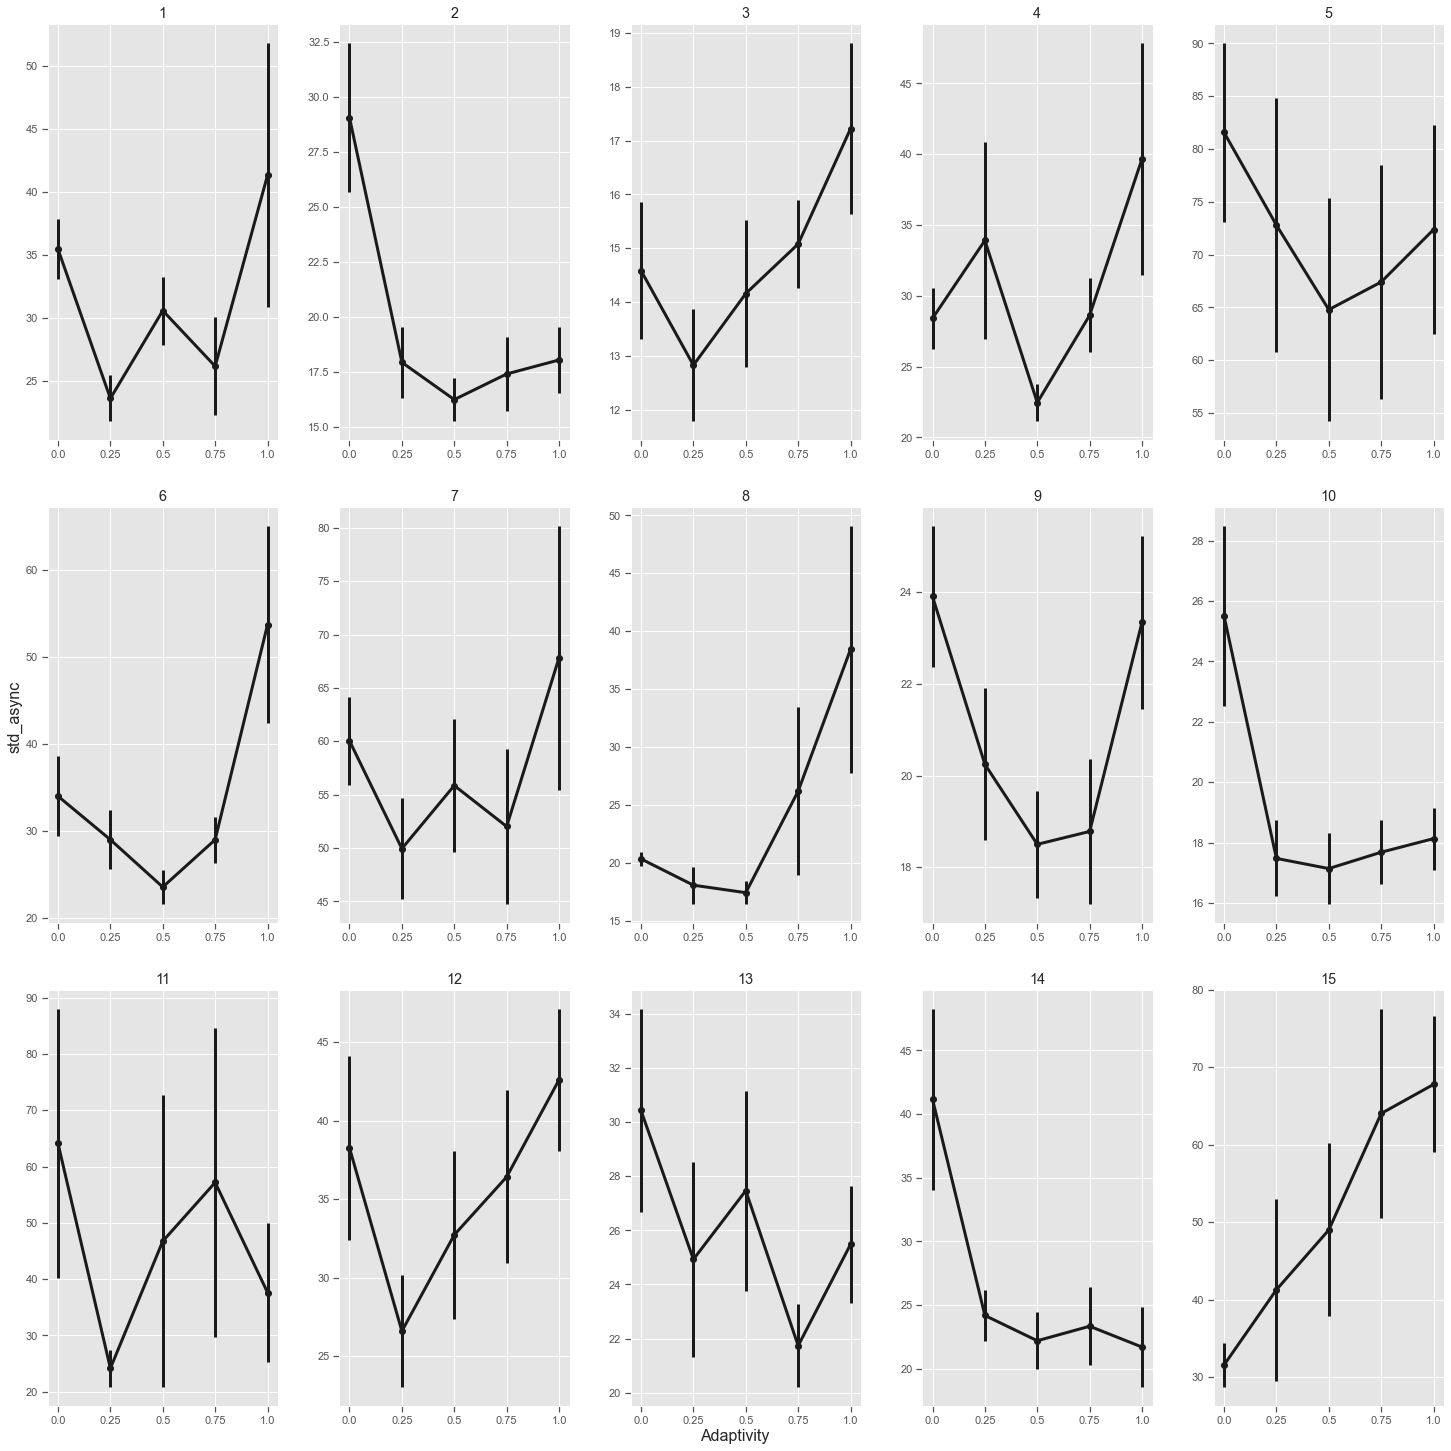

In [52]:
print('\nTapping data for each participant in Experiment 1: \n\n')
df = op.loc[op['expID'] == 1]
plot_all(df, 0, 'std_async')


Tapping data for each participant in Experiment 2: 




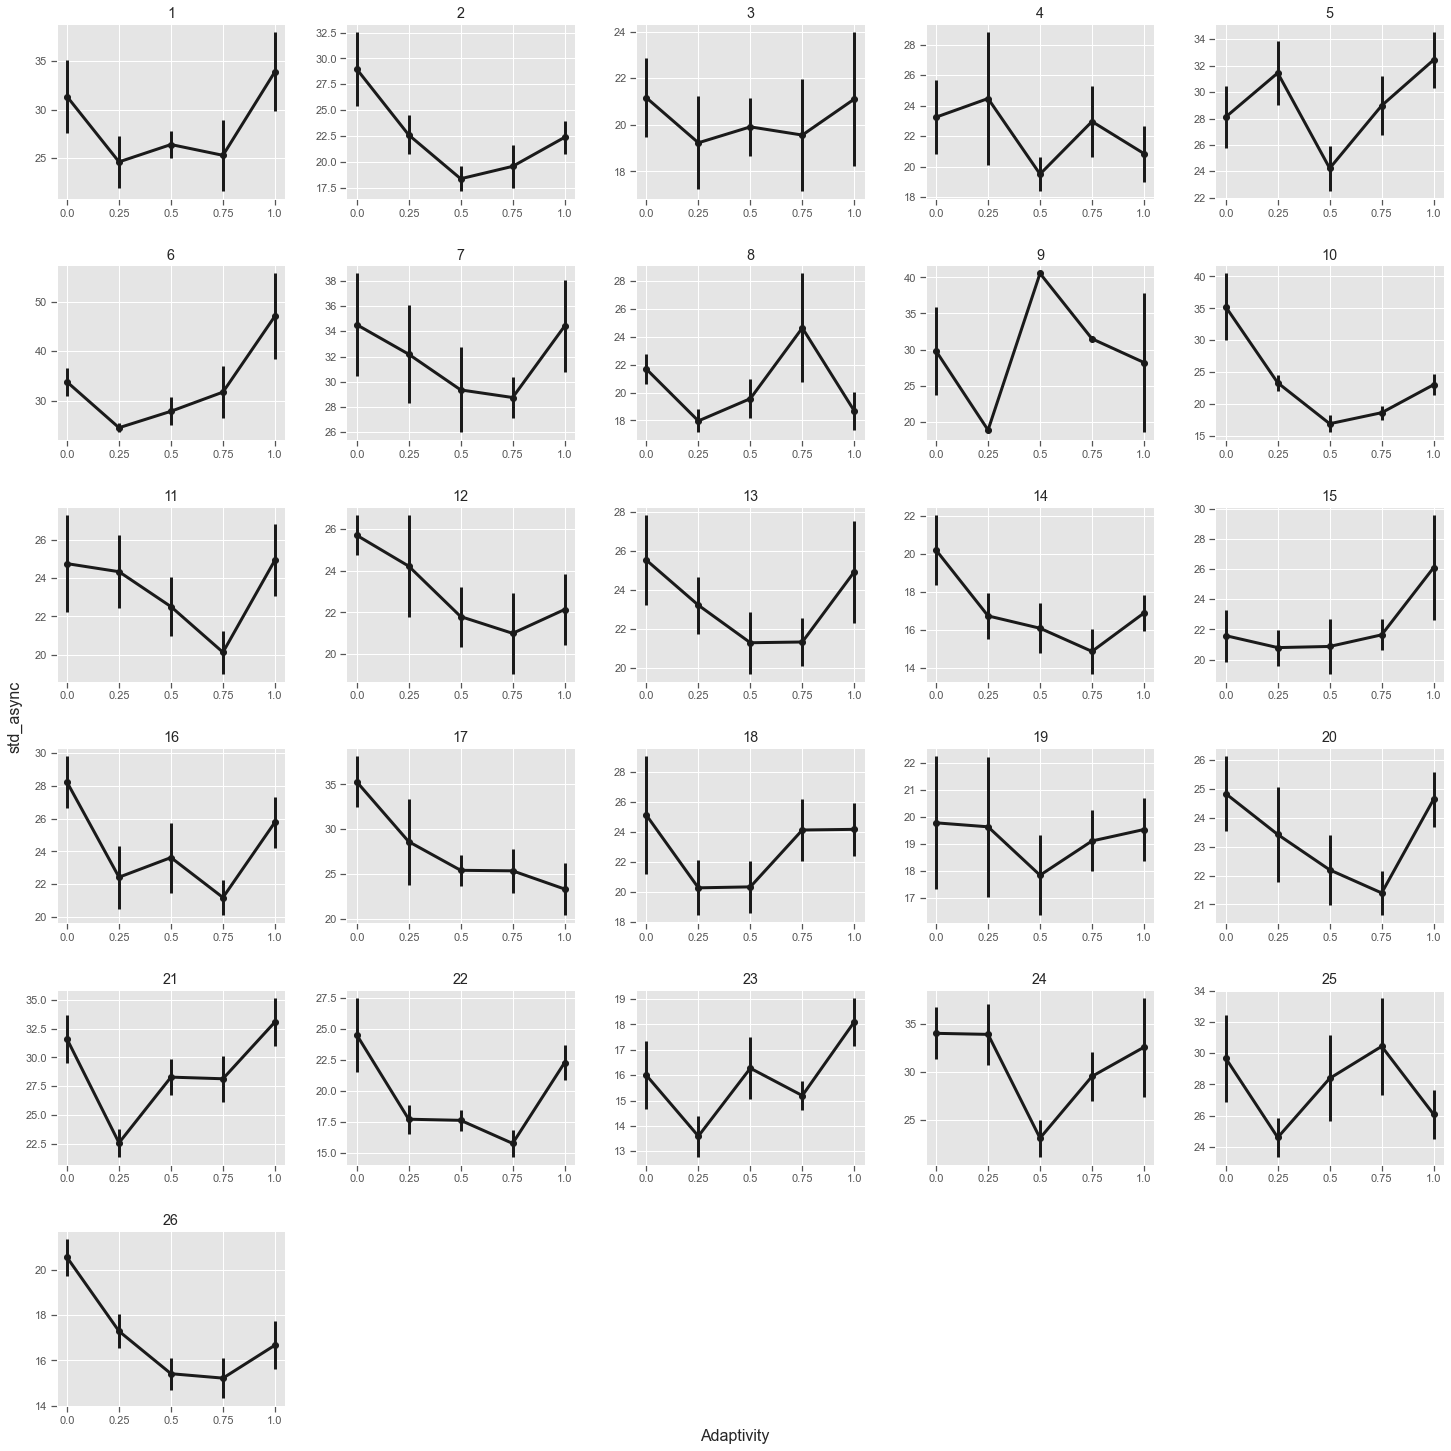

In [53]:
print('\nTapping data for each participant in Experiment 2: \n\n')
df = op.loc[op['expID'] == 2]
plot_all(df, 0, 'std_async')


Tapping data for each group in Experiment 3: 




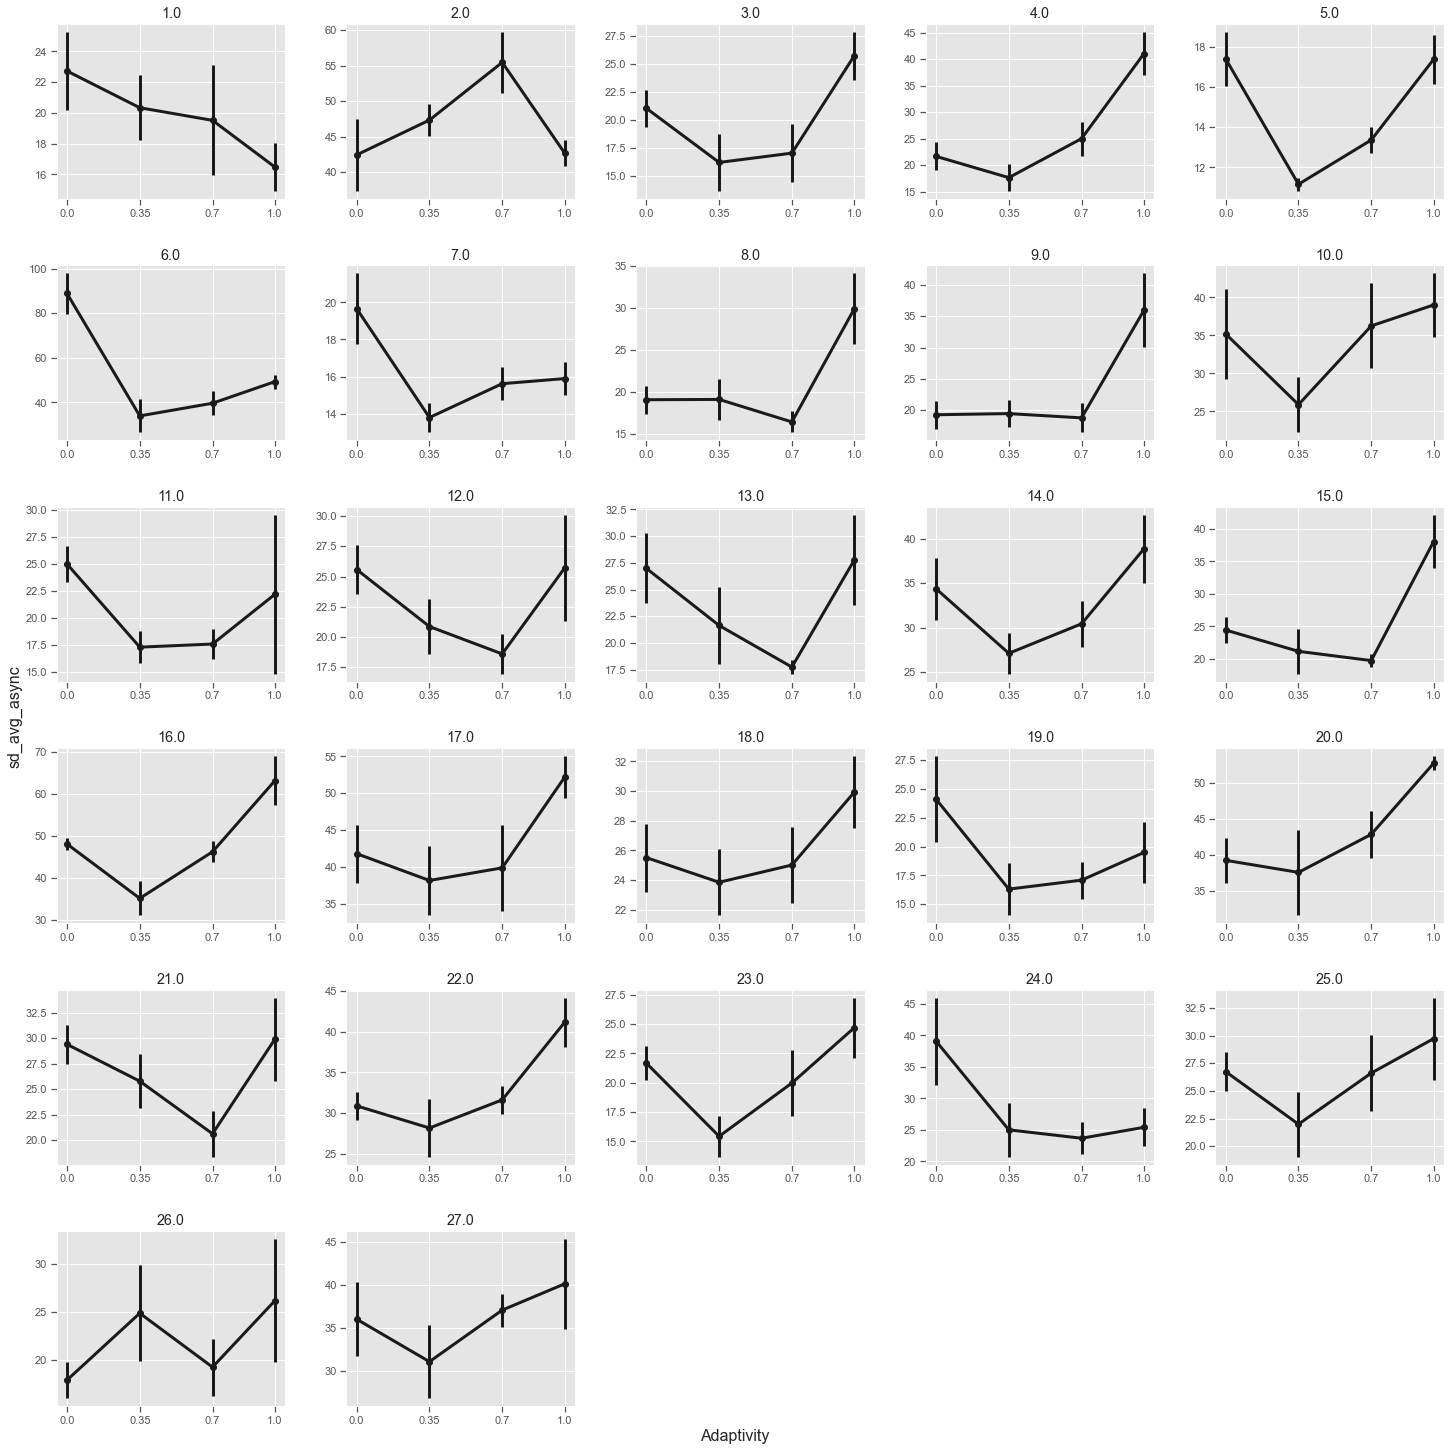

In [54]:
print('\nTapping data for each group in Experiment 3: \n\n')
df = fp.loc[fp['expID'] == 3]
plot_all(df, 1, 'sd_avg_async')


Tapping data for each group in Experiment 4: 




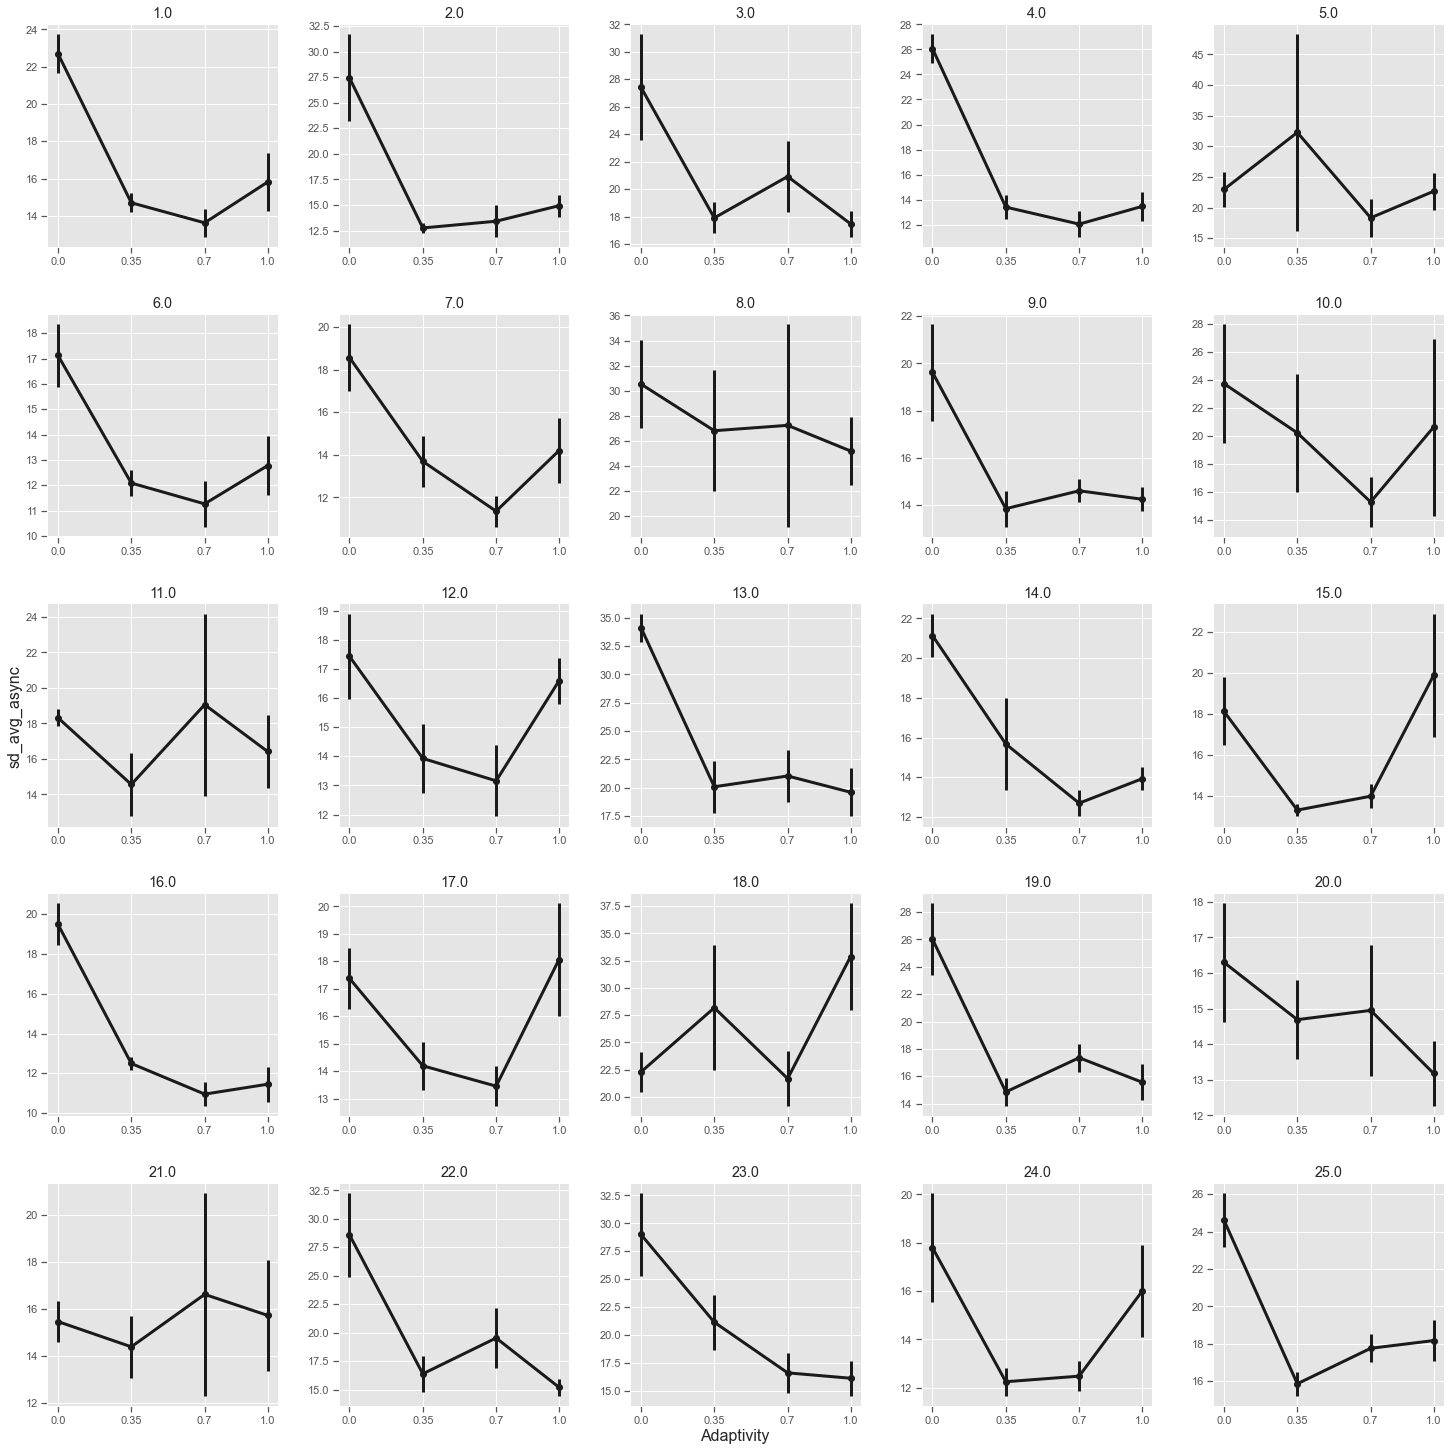

In [55]:
print('\nTapping data for each group in Experiment 4: \n\n')
df = fp.loc[fp['expID'] == 4]
plot_all(df, 1, 'sd_avg_async')


Tapping data for each group in Experiment 5: 




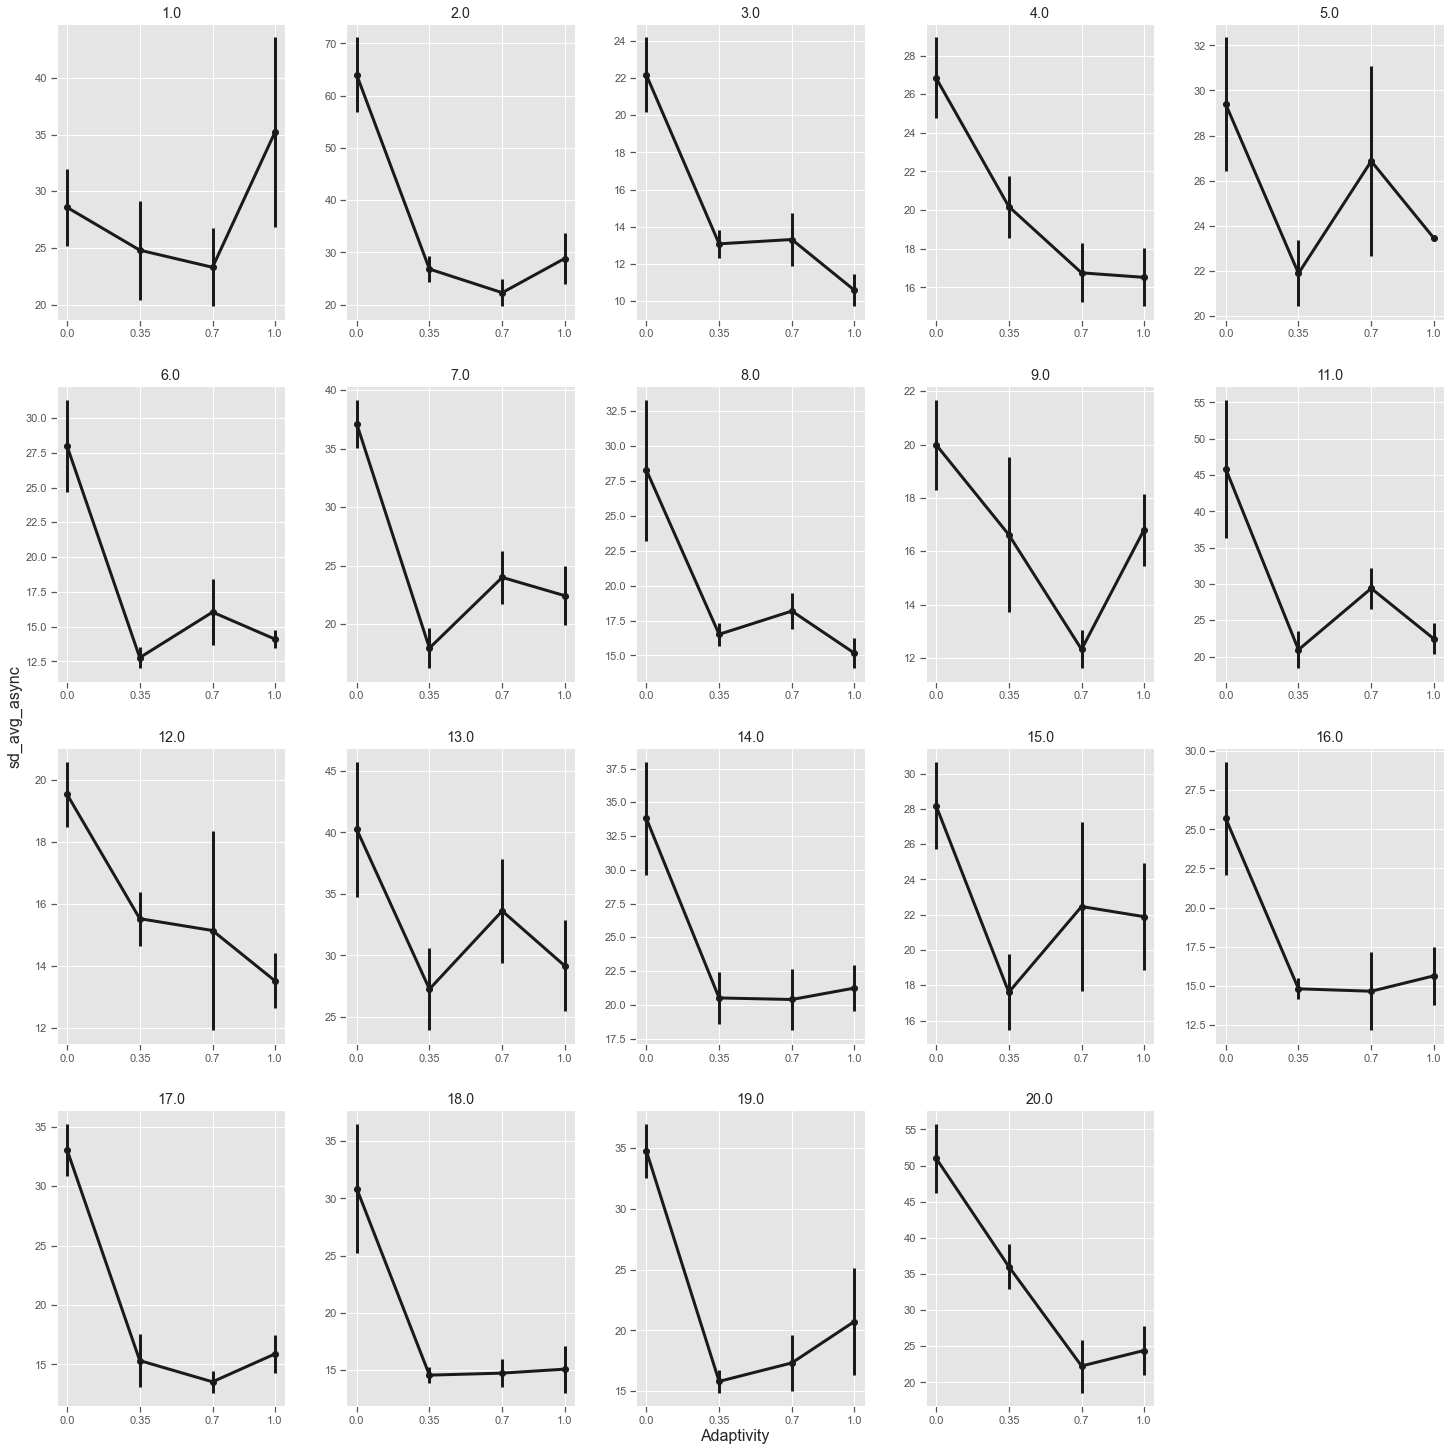

In [56]:
print('\nTapping data for each group in Experiment 5: \n\n')
df = fp.loc[fp['expID'] == 5]
plot_all(df, 1, 'sd_avg_async')

# For each experiment plot tapping data averaged over all participants

            mean       sem  mean-baseline
alpha                                    
0.00   37.231978  4.668134       0.000000
0.25   29.133635  3.989228      -8.098343
0.50   30.592674  4.130978      -6.639304
0.75   33.407185  4.603583      -3.824793
1.00   39.022962  4.921858       1.790984 

            mean       sem  mean-baseline
alpha                                    
0.00   26.739076  1.066073       0.000000
0.25   22.794144  0.951660      -3.944933
0.50   22.454569  1.078241      -4.284507
0.75   22.927839  1.020782      -3.811237
1.00   25.512960  1.332122      -1.226117 

            mean       sem  mean-baseline
alpha                                    
0.00   30.531826  2.774633       0.000000
0.35   24.312008  1.631966      -6.219818
0.70   26.339514  2.128154      -4.192312
1.00   33.349616  2.315286       2.817790 

            mean       sem  mean-baseline
alpha                                    
0.00   22.490324  1.017482       0.000000
0.35   16.788198  1.058540  

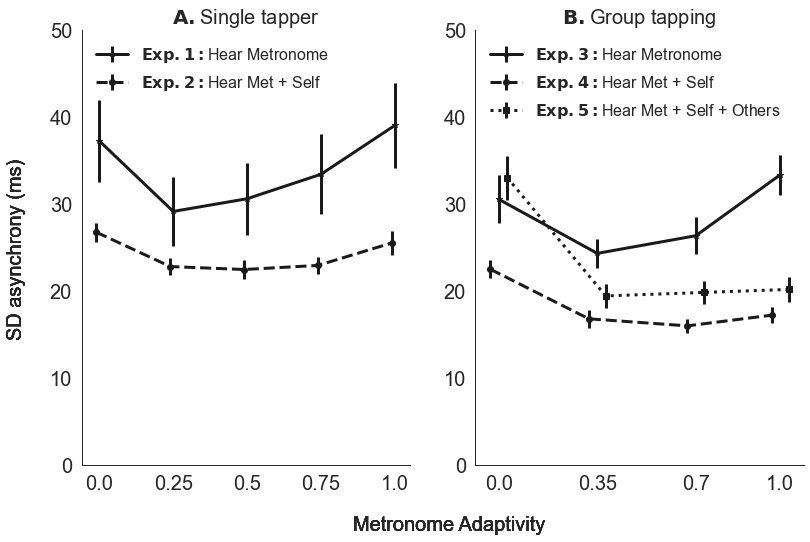

In [57]:
to_zscore = 0 # NOTE: be sure to change ylims accordingly
fig = plt.figure(figsize=(20,8))
expIDs = np.array([1,2,3,4,5])
line_defs = ['k*-', 'ko--', 'k*-', 'ko--', 'ks:']
label_defs = [r"$\bf{" + "Exp. 1: " + "}$" + 'Hear Metronome', r"$\bf{" + "Exp. 2: " + "}$" + 'Hear Met + Self', r"$\bf{" + "Exp. 3: " + "}$" + 'Hear Metronome', r"$\bf{" + "Exp. 4: " + "}$" + 'Hear Met + Self', r"$\bf{" + "Exp. 5: " + "}$" + 'Hear Met + Self + Others']
alpha_offset_defs = [0, -.01, 0, -.03, .03]
fsize = 20
sns.set_style("white")
ymin = 0
ymax = 50
yinc = 10

for idx, val in enumerate(expIDs):
    
    # Mask data by experiment
    if val < 3: # single tapper
        df = op.loc[op['expID'] == val]
        col = 'std_async'    
        group = 0
    else: # group tapping
        df = fp.loc[fp['expID'] == val]
        col = 'sd_avg_async'
        group = 1

    # Create plot   
    if val == 1:
        ax = fig.add_subplot(1, 3, 1)
        plt.title(r"$\bf{" + "A. " + "}$" + 'Single tapper', fontsize = fsize)#, horizontalalignment = 'right')
    if val == 3:
        ax = fig.add_subplot(1, 3, 2)
        plt.title(r"$\bf{" + "B. " + "}$" + 'Group tapping', fontsize = fsize)
    data = return_mean_sem(df, group, col, to_zscore)
    print(data, '\n')
    ax.errorbar(data.index.values+alpha_offset_defs[idx], data['mean'], yerr = data['sem'], fmt=line_defs[idx], label=label_defs[idx])  
    ax.set_xticks(data.index.values)
    ax.set_xticklabels(data.index.values, fontsize = fsize)
    ax.set_ylim(ymin, ymax) 
    ax.set_yticklabels(np.arange(ymin,ymax+1,yinc), fontsize = fsize)
    ax.legend(fontsize = 16, frameon=False, loc = 'upper left')
    fig.text(0.38, 0.02, 'Metronome Adaptivity', ha='center', va='center', fontsize=fsize)
    fig.text(0.08, 0.5, 'SD asynchrony (ms)', ha='center', va='center', rotation='vertical', fontsize=fsize)
    
sns.despine()   
sns.set(style="ticks", rc={"lines.linewidth": 3})
plt.savefig('Figures/allExp_tapping_plots.eps', dpi=1200, bbox_inches = 'tight',
    pad_inches = 0.5)


# Compute tapping statistics
We are interested in whether there is a significant difference in tapping performance between alpha conditions. Therefore, we can use an ANOVA. In our case, we will use a repeated measures ANOVA because we have multiple observations for each alpha condition (repeated measures) for each participant or group. 

In the output below, the headers correspond to the following:

- 'Source' : Name of the within-group factor
- 'SS' : Sum of squares
- 'DF' : Degrees of freedom 
- 'MS' : Mean squares
- 'F' : F-value
- 'p-unc' : Uncorrected p-value
- 'p-GG-corr' : Greenhouse-Geisser corrected p-value
- 'np2' : Partial eta-square effect size
- 'eps' : Greenhouse-Geisser epsilon factor (= index of sphericity)
- 'sphericity' : sphericity of the data (boolean)
- 'W-spher' : Sphericity test statistic
- 'p-spher' : p-value of the sphericity test


In the t-tests, we use hedges g for effect size. This is similar to Cohen's d but considered more appropriate for sample sizes < 20. Effect sizes should be interpretted as follows: 
- Small effect (cannot be discerned by the naked eye) = 0.2
- Medium Effect = 0.5
- Large Effect (can be seen by the naked eye) = 0.8

Note that we do not need to correct for multiple comparisons as these were planned comparisons. 


Let's first do this for data from Experiment 1:


In [58]:
df = op.loc[op['expID'] == 1]
to_zscore = 0
rmaov_results(df, 0, 'std_async', to_zscore)




ANOVA table

  Source           SS  DF          MS         F     p-unc  p-GG-corr  \
0  alpha  1068.657500   4  267.164375  4.813752  0.002081   0.011528   
1  Error  3108.013134  56   55.500235       NaN       NaN        NaN   

        np2       eps sphericity   W-spher   p-spher  
0  0.255863  0.578476      False  0.164122  0.008093  
1       NaN       NaN        NaN       NaN       NaN  


Comparisons between all means



,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,cohen
0,alpha,0.00,0.25,True,True,2.807804,14.0,one-sided,0.006982,0.048874,holm,8.477,0.481575
1,alpha,0.00,0.50,True,True,2.922677,14.0,one-sided,0.005566,0.044527,holm,10.201,0.388920
2,alpha,0.00,0.75,True,True,1.266785,14.0,one-sided,0.112951,0.338853,holm,1.03,0.213021
3,alpha,0.00,1.00,True,True,-0.432945,14.0,one-sided,0.335825,0.493078,holm,0.57,-0.096406
4,alpha,0.25,0.50,True,True,-0.703833,14.0,one-sided,0.246539,0.493078,holm,0.651,-0.092772
5,alpha,0.25,0.75,True,True,-1.556818,14.0,one-sided,0.070913,0.283652,holm,1.416,-0.256171
6,alpha,0.25,1.00,True,True,-3.827811,14.0,one-sided,0.000923,0.009233,holm,45.839,-0.569974
7,alpha,0.50,0.75,True,True,-1.918453,14.0,one-sided,0.037839,0.189196,holm,2.242,-0.166154
8,alpha,0.50,1.00,True,True,-3.184142,14.0,one-sided,0.003313,0.029818,holm,15.651,-0.479061
9,alpha,0.75,1.00,True,True,-2.182131,14.0,one-sided,0.023317,0.139904,holm,3.244,-0.304275


In [59]:
print('\n\nExperiment 2:')
rmaov_results(op.loc[op['expID'] == 2], 0, 'std_async', to_zscore)



Experiment 2:



ANOVA table

  Source           SS   DF         MS         F     p-unc  p-GG-corr  \
0  alpha   383.417432    4  95.854358  8.691905  0.000005   0.000051   
1  Error  1102.800317  100  11.028003       NaN       NaN        NaN   

        np2       eps sphericity   W-spher   p-spher  
0  0.257982  0.749179      False  0.392424  0.009351  
1       NaN       NaN        NaN       NaN       NaN  


Comparisons between all means



,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,cohen
0,alpha,0.00,0.25,True,True,5.325108,25.0,one-sided,0.000008,0.000081,holm,2787.128,0.765636
1,alpha,0.00,0.50,True,True,4.388624,25.0,one-sided,0.000091,0.000727,holm,312.24,0.783698
2,alpha,0.00,0.75,True,True,4.514265,25.0,one-sided,0.000066,0.000591,holm,418.012,0.716168
3,alpha,0.00,1.00,True,True,1.269234,25.0,one-sided,0.108024,0.432094,holm,0.851,0.199312
4,alpha,0.25,0.50,True,True,0.299943,25.0,one-sided,0.383350,0.766701,holm,0.432,0.065488
5,alpha,0.25,0.75,True,True,-0.157284,25.0,one-sided,0.438142,0.766701,holm,0.419,-0.026570
6,alpha,0.25,1.00,True,True,-2.518523,25.0,one-sided,0.009277,0.046385,holm,5.636,-0.460600
7,alpha,0.50,0.75,True,True,-0.781015,25.0,one-sided,0.221064,0.663191,holm,0.547,-0.088404
8,alpha,0.50,1.00,True,True,-2.932105,25.0,one-sided,0.003552,0.021311,holm,12.606,-0.494946
9,alpha,0.75,1.00,True,True,-3.067282,25.0,one-sided,0.002567,0.017969,holm,16.626,-0.427219


In [60]:
print('\n\nExperiment 3:')
rmaov_results(fp.loc[fp['expID'] == 3], 1, 'sd_avg_async', to_zscore)



Experiment 3:



ANOVA table

  Source           SS  DF          MS          F     p-unc  p-GG-corr  \
0  alpha  1344.142587   3  448.047529  11.330997  0.000003   0.000094   
1  Error  3084.257096  78   39.541758        NaN       NaN        NaN   

        np2       eps sphericity   W-spher   p-spher  
0  0.303528  0.652999      False  0.361566  0.000132  
1       NaN       NaN        NaN       NaN       NaN  


Comparisons between all means



,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,cohen
0,alpha,0.00,0.35,True,True,3.018538,26.0,one-sided,2.813093e-03,0.011252,holm,15.198,0.525885
1,alpha,0.00,0.70,True,True,2.091630,26.0,one-sided,2.319267e-02,0.046385,holm,2.643,0.326299
2,alpha,0.00,1.00,True,True,-1.284963,26.0,one-sided,1.050676e-01,0.105068,holm,0.853,-0.212219
3,alpha,0.35,0.70,True,True,-2.392882,26.0,one-sided,1.211531e-02,0.036346,holm,4.466,-0.205759
4,alpha,0.35,1.00,True,True,-6.225089,26.0,one-sided,6.906053e-07,0.000004,holm,2.64e+04,-0.868350
5,alpha,0.70,1.00,True,True,-5.414053,26.0,one-sided,5.652889e-06,0.000028,holm,3830.321,-0.606692


In [61]:
print('\n\nExperiment 4:')
rmaov_results(fp.loc[fp['expID'] == 4], 1, 'sd_avg_async', to_zscore)



Experiment 4:



ANOVA table

  Source          SS  DF          MS         F         p-unc     p-GG-corr  \
0  alpha  657.566692   3  219.188897  22.09474  3.004728e-10  2.005507e-07   
1  Error  714.269573  72    9.920411       NaN           NaN           NaN   

        np2       eps sphericity  W-spher   p-spher  
0  0.479333  0.653884      False  0.45622  0.003196  
1       NaN       NaN        NaN      NaN       NaN  


Comparisons between all means



,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,cohen
0,alpha,0.00,0.35,True,True,5.170304,24.0,one-sided,1.350818e-05,6.754089e-05,holm,1751.308,1.098449
1,alpha,0.00,0.70,True,True,7.707226,24.0,one-sided,3.033231e-08,1.819939e-07,holm,4.794e+05,1.423438
2,alpha,0.00,1.00,True,True,4.507576,24.0,one-sided,7.264061e-05,2.905625e-04,holm,384.458,1.095370
3,alpha,0.35,0.70,True,True,1.072757,24.0,one-sided,1.470244e-01,2.940488e-01,holm,0.707,0.173017
4,alpha,0.35,1.00,True,True,-0.656346,24.0,one-sided,2.589229e-01,2.940488e-01,holm,0.513,-0.084733
5,alpha,0.70,1.00,True,True,-1.776750,24.0,one-sided,4.414424e-02,1.324327e-01,holm,1.65,-0.287207


In [62]:
print('\n\nExperiment 5:')
rmaov_results(fp.loc[fp['expID'] == 5], 1, 'sd_avg_async', to_zscore)



Experiment 5:



ANOVA table

  Source           SS  DF          MS          F         p-unc     p-GG-corr  \
0  alpha  2497.444033   3  832.481344  33.729823  2.026119e-12  4.485664e-08   
1  Error  1332.766916  54   24.680869        NaN           NaN           NaN   

        np2       eps sphericity   W-spher   p-spher  
0  0.652038  0.579521      False  0.338408  0.002854  
1       NaN       NaN        NaN       NaN       NaN  


Comparisons between all means



,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,cohen
0,alpha,0.00,0.35,True,True,7.290665,18.0,one-sided,4.478712e-07,0.000003,holm,3.956e+04,1.537892
1,alpha,0.00,0.70,True,True,6.186793,18.0,one-sided,3.852441e-06,0.000018,holm,5589.309,1.492958
2,alpha,0.00,1.00,True,True,6.226494,18.0,one-sided,3.555409e-06,0.000018,holm,6010.171,1.432051
3,alpha,0.35,0.70,True,True,-0.347013,18.0,one-sided,3.663028e-01,0.730203,holm,0.501,-0.067858
4,alpha,0.35,1.00,True,True,-0.750581,18.0,one-sided,2.313023e-01,0.693907,holm,0.61,-0.122052
5,alpha,0.70,1.00,True,True,-0.350268,18.0,one-sided,3.651015e-01,0.730203,holm,0.502,-0.056462


# Compare tapping results between experiments 
Conduct mixed ANOVA with exp as between predictor, alpha as within, and async as outcome, to understand effect of auditory feedback

In [63]:
# single player experiments
print('\n\n\nSingle tapper experiments\n')
means = op.groupby(['session_id', 'alpha', 'expID'], as_index=False)['std_async'].mean()
print('ANOVA result:\n')
print(means.mixed_anova(dv="std_async", between="expID", within="alpha", subject="session_id"))
print('\n\n')
print('Contrasts:\n')
print(pg.pairwise_ttests(dv='std_async', between='expID', within="alpha", subject="session_id", data=means, alpha = .05, tail = 'one-sided', padjust = 'holm', effsize = 'cohen'))

ex1 = return_mean_sem(op.loc[op['expID'] == 1], 0, 'std_async', 0)
ex2 = return_mean_sem(op.loc[op['expID'] == 2], 0, 'std_async', 0)

print('\n\nDifference between overall means Exp. 1 vs. 2:\n')
print(ex2['mean'].mean() - ex1['mean'].mean())


# group experiments
print('\n\n\nGroup experiments\n')
means = fp.groupby(['group', 'alpha', 'expID'], as_index=False)['sd_avg_async'].mean()
print('ANOVA result:\n')
print(means.mixed_anova(dv="sd_avg_async", between="expID", within="alpha", subject="group"))
print('\n\n')
print('Contrasts:\n')
print(pg.pairwise_ttests(dv='sd_avg_async', between='expID', within="alpha", subject="group", data=means, alpha = .05, tail = 'one-sided', padjust = 'holm', effsize = 'cohen'))

ex3 = return_mean_sem(fp.loc[fp['expID'] == 3], 1, 'sd_avg_async', 0)
ex4 = return_mean_sem(fp.loc[fp['expID'] == 4], 1, 'sd_avg_async', 0)
ex5 = return_mean_sem(fp.loc[fp['expID'] == 5], 1, 'sd_avg_async', 0)

print('\n\nDifference between overall means Exp. 3 vs. 4:\n')
print(ex4['mean'].mean() - ex3['mean'].mean())

print('\n\nDifference between overall means Exp. 4 vs. 5:\n')
print(ex5['mean'].mean() - ex4['mean'].mean())

print('\n\nDifference between overall means Exp. 3 vs. 5:\n')
print(ex5['mean'].mean() - ex3['mean'].mean())




Single tapper experiments

ANOVA result:

        Source           SS  DF1  DF2           MS          F         p-unc  \
0        expID  4560.272966    1   39  4560.272966   8.574201  5.666685e-03   
1        alpha  1172.012775    4  156   293.003194  10.855028  8.641801e-08   
2  Interaction   280.062158    4  156    70.015540   2.593899  3.863157e-02   

   p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0        NaN  0.180228       NaN        NaN       NaN       NaN  
1   0.000005  0.217732  0.720064      False  0.398905  0.000054  
2        NaN  0.062362       NaN        NaN       NaN       NaN  



Contrasts:

         Contrast alpha     A     B Paired  Parametric         T        dof  \
0           alpha     -   0.0  0.25   True        True  4.646990  40.000000   
1           alpha     -   0.0   0.5   True        True  4.973208  40.000000   
2           alpha     -   0.0  0.75   True        True  3.169382  40.000000   
3           alpha     -   0.0   1.0   True 